In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set style for plots
sns.set(style='whitegrid')


# Load the data
df = pd.read_csv('merged_dataframe_1_hour_score.csv')
df.head()

,Date,user_followers,user_friends,user_favourites,negative_prob,neutral_prob,positive_prob,score,number_of_tweets,close,volume,number_of_trades
0,2021-02-06 00:00:00,2436.357724,585.739837,3569.967480,0.043702,0.469991,0.486307,1654.253850,123,38528.798667,89.958059,2461.783333
1,2021-02-06 01:00:00,5323.062500,825.770833,5073.534722,0.062348,0.525353,0.412300,1300.050434,144,38995.976333,166.732440,3289.350000
2,2021-02-06 02:00:00,2270.540816,554.785714,3736.653061,0.058790,0.585356,0.355854,506.669396,98,39094.879333,98.531242,2137.866667
3,2021-02-06 03:00:00,1852.410526,715.778947,4673.894737,0.023694,0.597381,0.378926,2287.709135,95,39406.951167,68.612706,1528.683333
4,2021-02-06 04:00:00,7706.674699,934.240964,4727.939759,0.093185,0.487797,0.419018,1018.531730,83,39207.041667,44.645848,1008.700000


In [27]:
# Convert 'Date' to datetime type and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check the prepared dataframe
print(df.head())

                     user_followers  user_friends  user_favourites  \
Date                                                                 
2021-02-06 00:00:00     2436.357724    585.739837      3569.967480   
2021-02-06 01:00:00     5323.062500    825.770833      5073.534722   
2021-02-06 02:00:00     2270.540816    554.785714      3736.653061   
2021-02-06 03:00:00     1852.410526    715.778947      4673.894737   
2021-02-06 04:00:00     7706.674699    934.240964      4727.939759   

                     negative_prob  neutral_prob  positive_prob        score  \
Date                                                                           
2021-02-06 00:00:00       0.043702      0.469991       0.486307  1654.253850   
2021-02-06 01:00:00       0.062348      0.525353       0.412300  1300.050434   
2021-02-06 02:00:00       0.058790      0.585356       0.355854   506.669396   
2021-02-06 03:00:00       0.023694      0.597381       0.378926  2287.709135   
2021-02-06 04:00:00       0.0

In [28]:
def get_longest_consecutive_non_zero_subset(input_list: list):
    max_length = 0
    current_length = 0
    max_subset_start_index = -1
    current_start_index = -1

    for index, number in enumerate(input_list):
        if number > 0:
            current_length += 1
            if current_length == 1:
                # Start of new subset
                current_start_index = index
        else:
            if current_length > max_length:
                max_length = current_length
                max_subset_start_index = current_start_index
            current_length = 0

    # Handle case where the max subset is at the end of the list
    if current_length > max_length:
        max_length = current_length
        max_subset_start_index = current_start_index

    max_subset_end_index = max_subset_start_index + max_length - 1
    return input_list[max_subset_start_index:max_subset_end_index + 1], max_subset_start_index, max_subset_end_index

# Test the function
test_list = [0, 1, 2, 3, 0, 0, 1, 2, 3, 4, 0]
max_subset, start_index, end_index = get_longest_consecutive_non_zero_subset(test_list)

print(f"Longest subset: {max_subset}")
print(f"Starting index: {start_index}")
print(f"Ending index: {end_index}")

Longest subset: [1, 2, 3, 4]
Starting index: 6
Ending index: 9


In [29]:
max_subset, start_index, end_index = get_longest_consecutive_non_zero_subset(df['number_of_tweets'])
print(f"Longest subset: {max_subset}")
print(f"Starting index: {start_index}")
print(f"Ending index: {end_index}")

Longest subset: Date
2021-07-16 02:00:00       8
2021-07-16 03:00:00      34
2021-07-16 04:00:00      41
2021-07-16 05:00:00      42
2021-07-16 06:00:00      32
                       ... 
2021-07-30 19:00:00    1628
2021-07-30 20:00:00    2354
2021-07-30 21:00:00    2464
2021-07-30 22:00:00    1746
2021-07-30 23:00:00    1808
Name: number_of_tweets, Length: 358, dtype: int64
Starting index: 3842
Ending index: 4199


In [30]:
df1 = df.iloc[3842:4199]

In [31]:
zeros_per_column = (df1 == 0).sum()

print(zeros_per_column)

user_followers      0
user_friends        0
user_favourites     0
negative_prob       0
neutral_prob        0
positive_prob       0
score               0
number_of_tweets    0
close               0
volume              0
number_of_trades    0
dtype: int64


In [8]:
df.columns

Index(['user_followers', 'user_friends', 'user_favourites', 'negative_prob',
       'neutral_prob', 'positive_prob', 'number_of_tweets', 'open', 'volume',
       'number_of_trades'],
      dtype='object')

In [9]:
df.drop(['user_followers', 'user_friends', 'user_favourites', 'open',
       'volume', 'number_of_trades'], axis = 1, inplace = True)

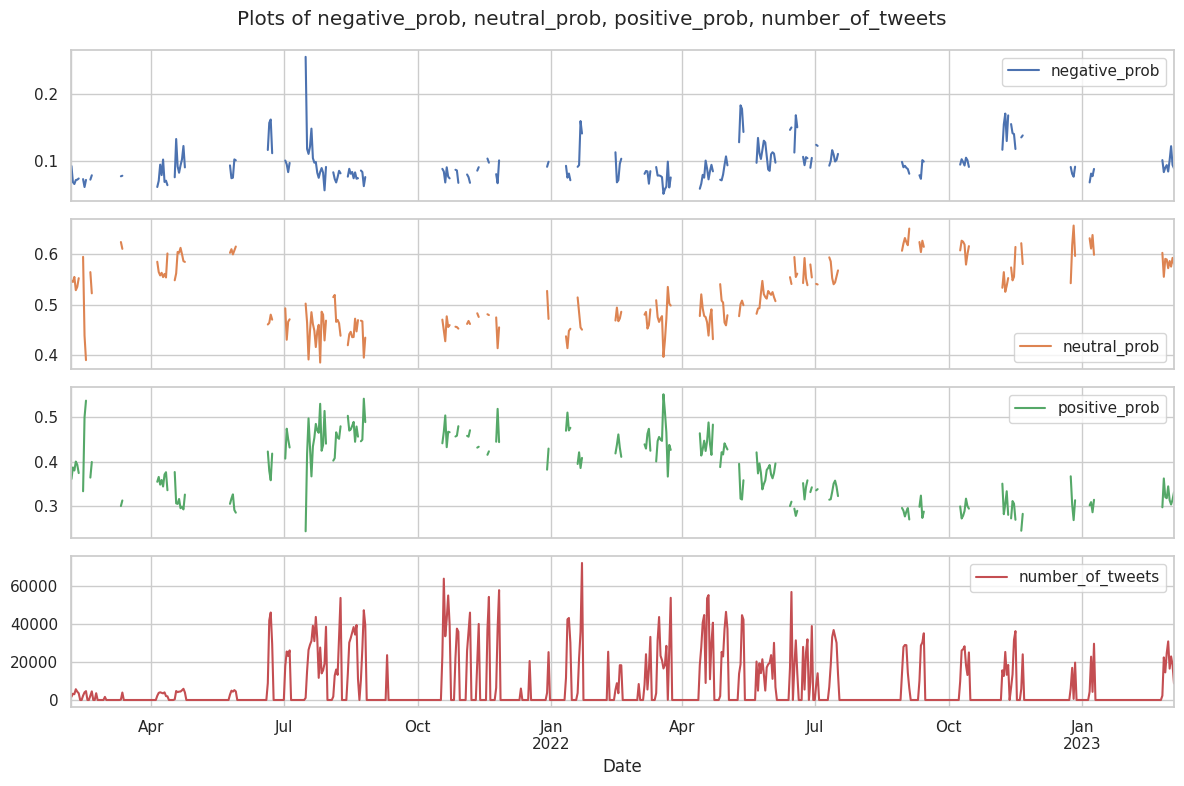

In [19]:
# Time Series Plots
df.plot(subplots=True, layout=(4, 1), figsize=(12, 8), 
        title='Plots of negative_prob, neutral_prob, positive_prob, number_of_tweets')

# Adjust the layout spacing
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
def add_value_labels_and_rotate_labels(ax):
    bars = ax.containers[0]
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # The text inside the bar
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the text
                    xytext=(0, 3),  # Offset of the text from the bar top
                    textcoords="offset points",
                    ha='center')
    
    # Rotate and align the x-axis labels
    ax.set_xticks(np.arange(len(ax.get_xticks())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

In [40]:
df1.columns

Index(['user_followers', 'user_friends', 'user_favourites', 'negative_prob',
       'neutral_prob', 'positive_prob', 'score', 'number_of_tweets', 'close',
       'volume', 'number_of_trades'],
      dtype='object')

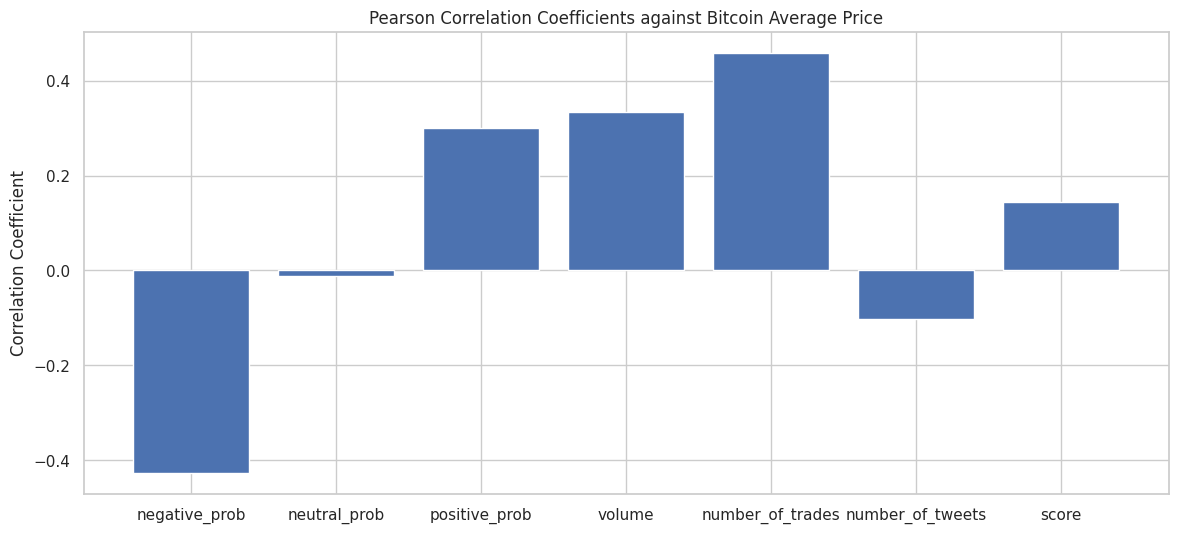

In [44]:
# Calculate Pearson Correlation Coefficient
pearson_btc_xau = stats.pearsonr(df1['close'], df1['negative_prob'])
pearson_btc_spx = stats.pearsonr(df1['close'], df1['neutral_prob'])
pearson_btc_dxy = stats.pearsonr(df1['close'], df1['positive_prob'])
pearson_btc_fvx = stats.pearsonr(df1['close'], df1['volume'])
pearson_btc_tnx = stats.pearsonr(df1['close'], df1['number_of_trades'])
pearson_btc_znx = stats.pearsonr(df1['close'], df1['number_of_tweets'])
pearson_btc_ynx = stats.pearsonr(df1['close'], df1['score'])

# Pearson Correlation Coefficient
pearson_correlations = [pearson_btc_xau[0], pearson_btc_spx[0], pearson_btc_dxy[0], pearson_btc_fvx[0], pearson_btc_tnx[0], pearson_btc_znx[0], pearson_btc_ynx[0]]
pearson_labels = ['negative_prob', 'neutral_prob', 'positive_prob', 'volume', 'number_of_trades', 'number_of_tweets', 'score']

# Set up the figure for Pearson Correlation Coefficient
fig, ax = plt.subplots(figsize=(14, 6))

# Plot Pearson Correlation Coefficient
bars = ax.bar(pearson_labels, pearson_correlations)
ax.set_title('Pearson Correlation Coefficients against Bitcoin Average Price')
ax.set_ylabel('Correlation Coefficient')

# Call the function for adding value labels inside the bars and tilting the horizontal labels
#add_value_labels_and_rotate_labels(ax)

# Show the plot for Pearson Correlation Coefficient
plt.show()

In [45]:
bitcoin = pd.read_csv('bitcoin_2017_to_2023.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['timestamp'])
bitcoin.set_index('Date', inplace=True)
print(bitcoin.columns)
# Check the prepared dataframe

crypto_usd_grouped = bitcoin.resample('D')['close'].mean()
#crypto_usd_grouped = crypto_usd_grouped['2021-02-06':'2023-03-05']  # Filters rows from Feb 10 to Feb 11 inclusive
crypto_usd_grouped.head(5)

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')


Date
2017-08-17    4358.630667
2017-08-18    4230.951715
2017-08-19    4070.712250
2017-08-20    4123.014063
2017-08-21    4035.014465
Freq: D, Name: close, dtype: float64

In [46]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']

In [47]:
beggining = max(df1.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(df1.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = df1[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

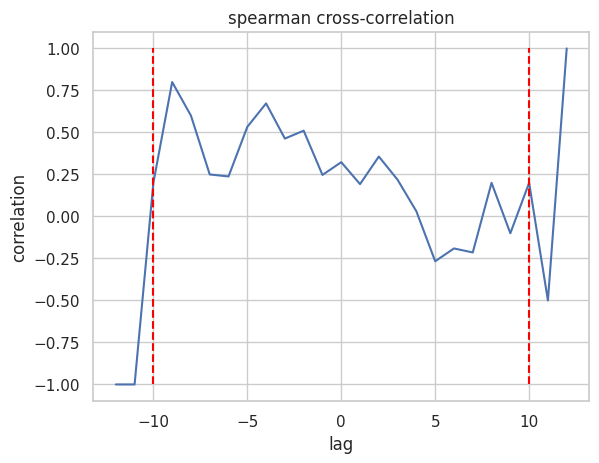

In [54]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.vlines([-10, 10], -1, 1, linestyles='dashed', colors='red')
plt.ylabel("correlation")
plt.show()